In [124]:
# Import modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [125]:
from google.colab import files
uploaded = files.upload()
import io

df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_train.head(n=4)


Saving train.csv to train (4).csv


Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000

[4 rows x 81 columns]

In [126]:
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_test.head(n=4)

Saving test.csv to test (4).csv


Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal

[4 rows x 80 columns]

In [127]:
SalePrice_train = df_train.SalePrice
data = pd.concat([df_train.drop(['SalePrice'], axis=1), df_test])

In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [129]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


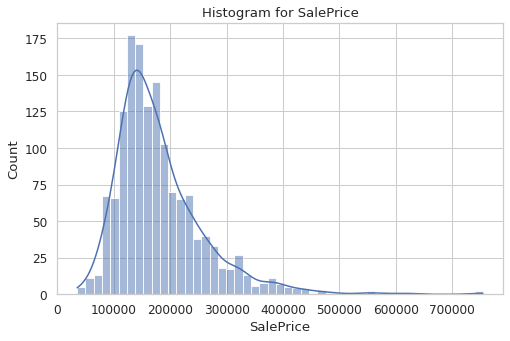

In [130]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(df_train['SalePrice'],kde=True)
plt.title("Histogram for SalePrice")
# Skew and kurt
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Figure 1.1: distribution of the dependent variable sale prices

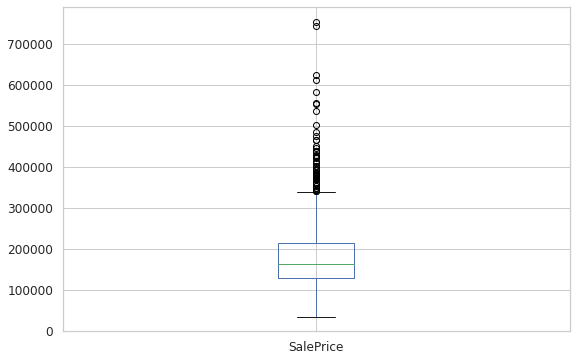

In [131]:
df_train.SalePrice.plot.box()
plt.tight_layout(pad=0.5)

Figure 1.2: box plot of the dependent variable sale prices

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

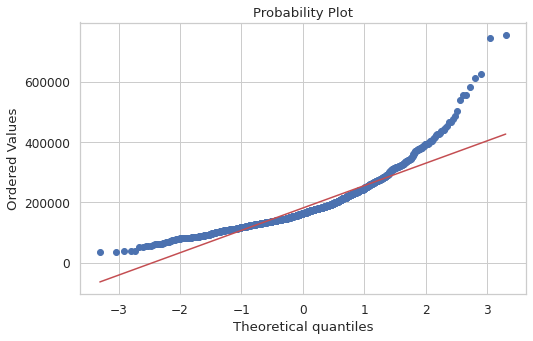

In [132]:
stats.probplot(df_train.SalePrice, plot=sns.mpl.pyplot)

Figure 1.3: Q-Q plot of the dependent variable sale prices

In [133]:
df_train.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [134]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
df_train_missing_value = pd.DataFrame({'column_name': df_train.columns,'percent_missing': percent_missing})
df_train_missing_value = df_train_missing_value.sort_values('percent_missing',ascending=False)
df_train_missing_value[df_train_missing_value.percent_missing>0]

column_name  percent_missing
PoolQC              PoolQC        99.520548
MiscFeature    MiscFeature        96.301370
Alley                Alley        93.767123
Fence                Fence        80.753425
FireplaceQu    FireplaceQu        47.260274
LotFrontage    LotFrontage        17.739726
GarageYrBlt    GarageYrBlt         5.547945
GarageCond      GarageCond         5.547945
GarageType      GarageType         5.547945
GarageFinish  GarageFinish         5.547945
GarageQual      GarageQual         5.547945
BsmtFinType2  BsmtFinType2         2.602740
BsmtExposure  BsmtExposure         2.602740
BsmtQual          BsmtQual         2.534247
BsmtCond          BsmtCond         2.534247
BsmtFinType1  BsmtFinType1         2.534247
MasVnrArea      MasVnrArea         0.547945
MasVnrType      MasVnrType         0.547945
Electrical      Electrical         0.068493

Figure 2.1: list of columns of the percentage of missing values

(1460, 36)


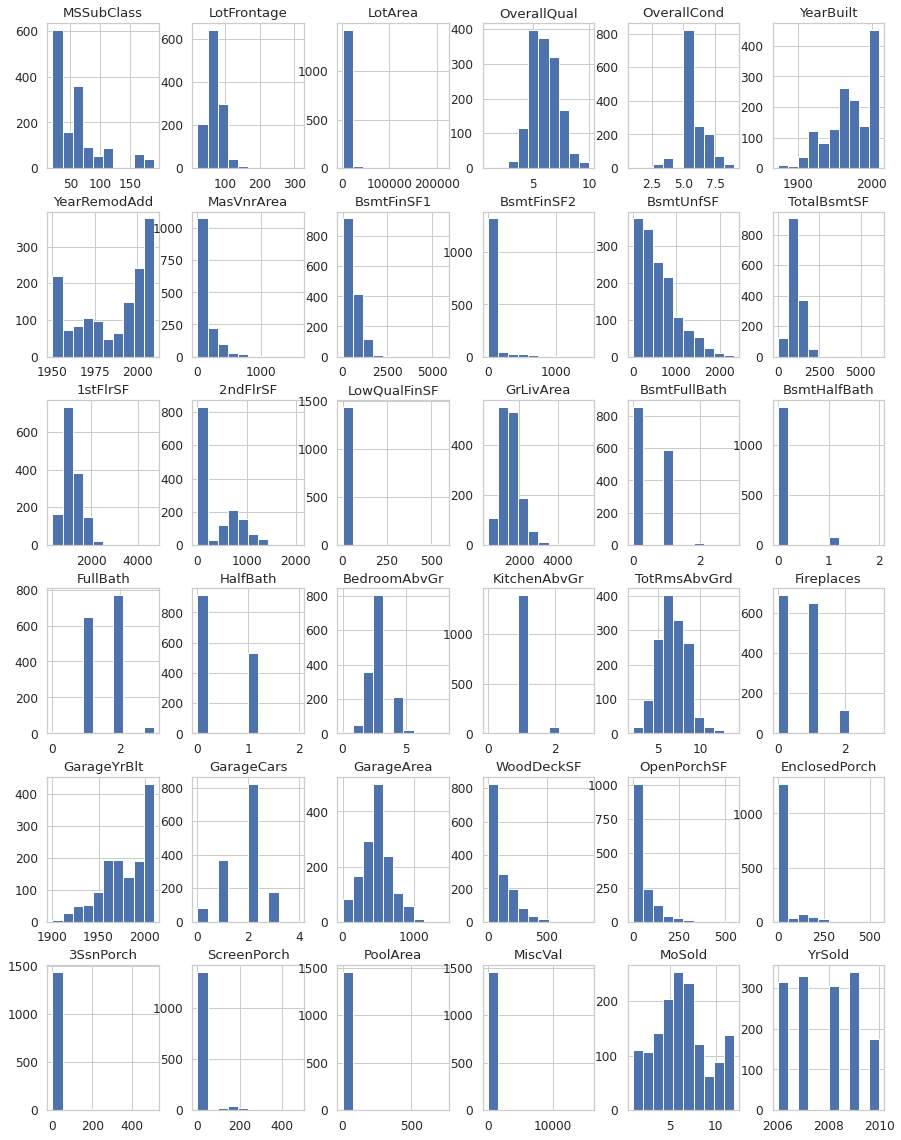

In [135]:
df_train_num_predictors = df_train_num.drop(['SalePrice'], axis=1)
print(df_train_num_predictors.shape)
df_train_num_predictors.hist(bins=10, figsize=(15, 20), layout=(6, 6));

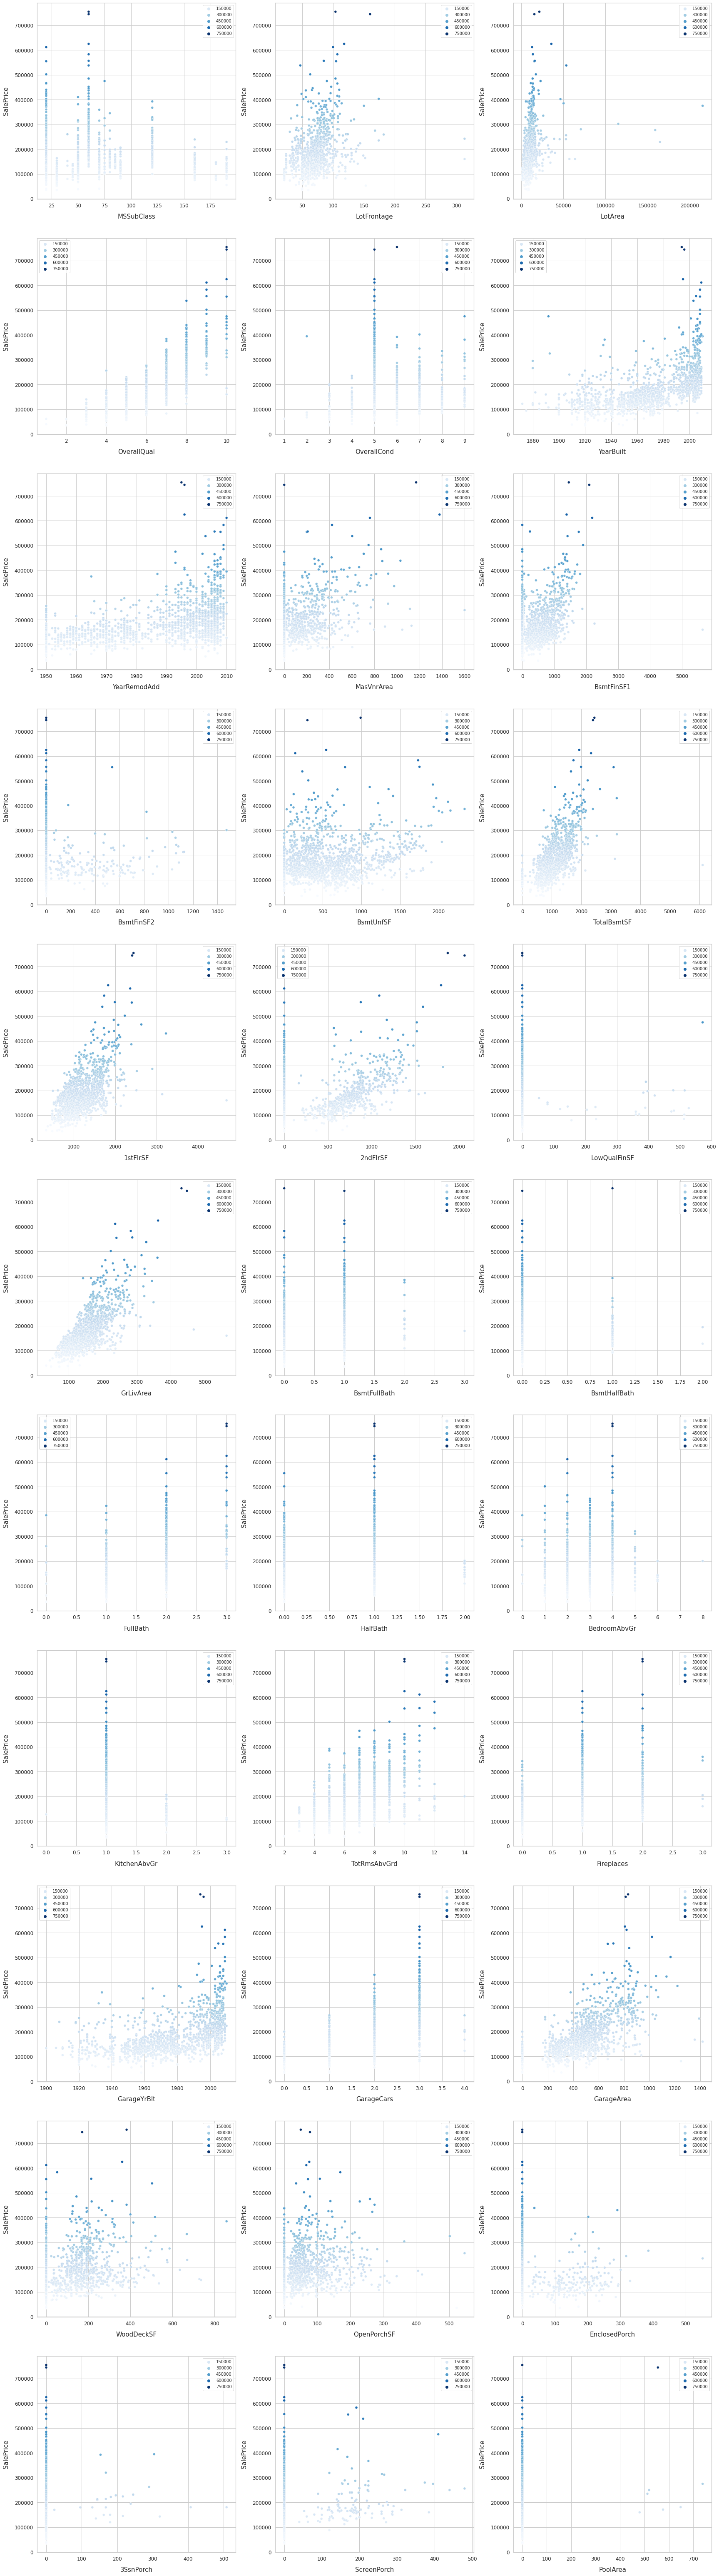

In [136]:
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 150))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(df_train_num_predictors), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(df_train_num_predictors)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=df_train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

Figure 3.1: scatter plots of continuous variables versus the sale price

In [137]:
# Outliers
print(df_train[(df_train.GrLivArea>4500) & (df_train.SalePrice<200000)])
print(df_train[(df_train['1stFlrSF']>4500) & (df_train.SalePrice<200000)])
print(df_train[(df_train.LotFrontage>300)])

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
523    524          60       RL  ...       New        Partial    184750
1298  1299          60       RL  ...       New        Partial    160000

[2 rows x 81 columns]
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
1298  1299          60       RL  ...       New        Partial    160000

[1 rows x 81 columns]
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
934    935          20       RL  ...        WD         Normal    242000
1298  1299          60       RL  ...       New        Partial    160000

[2 rows x 81 columns]


Figure 2.2: list of outliers

Categorical: (1460, 43)
Numerical: (1460, 37)


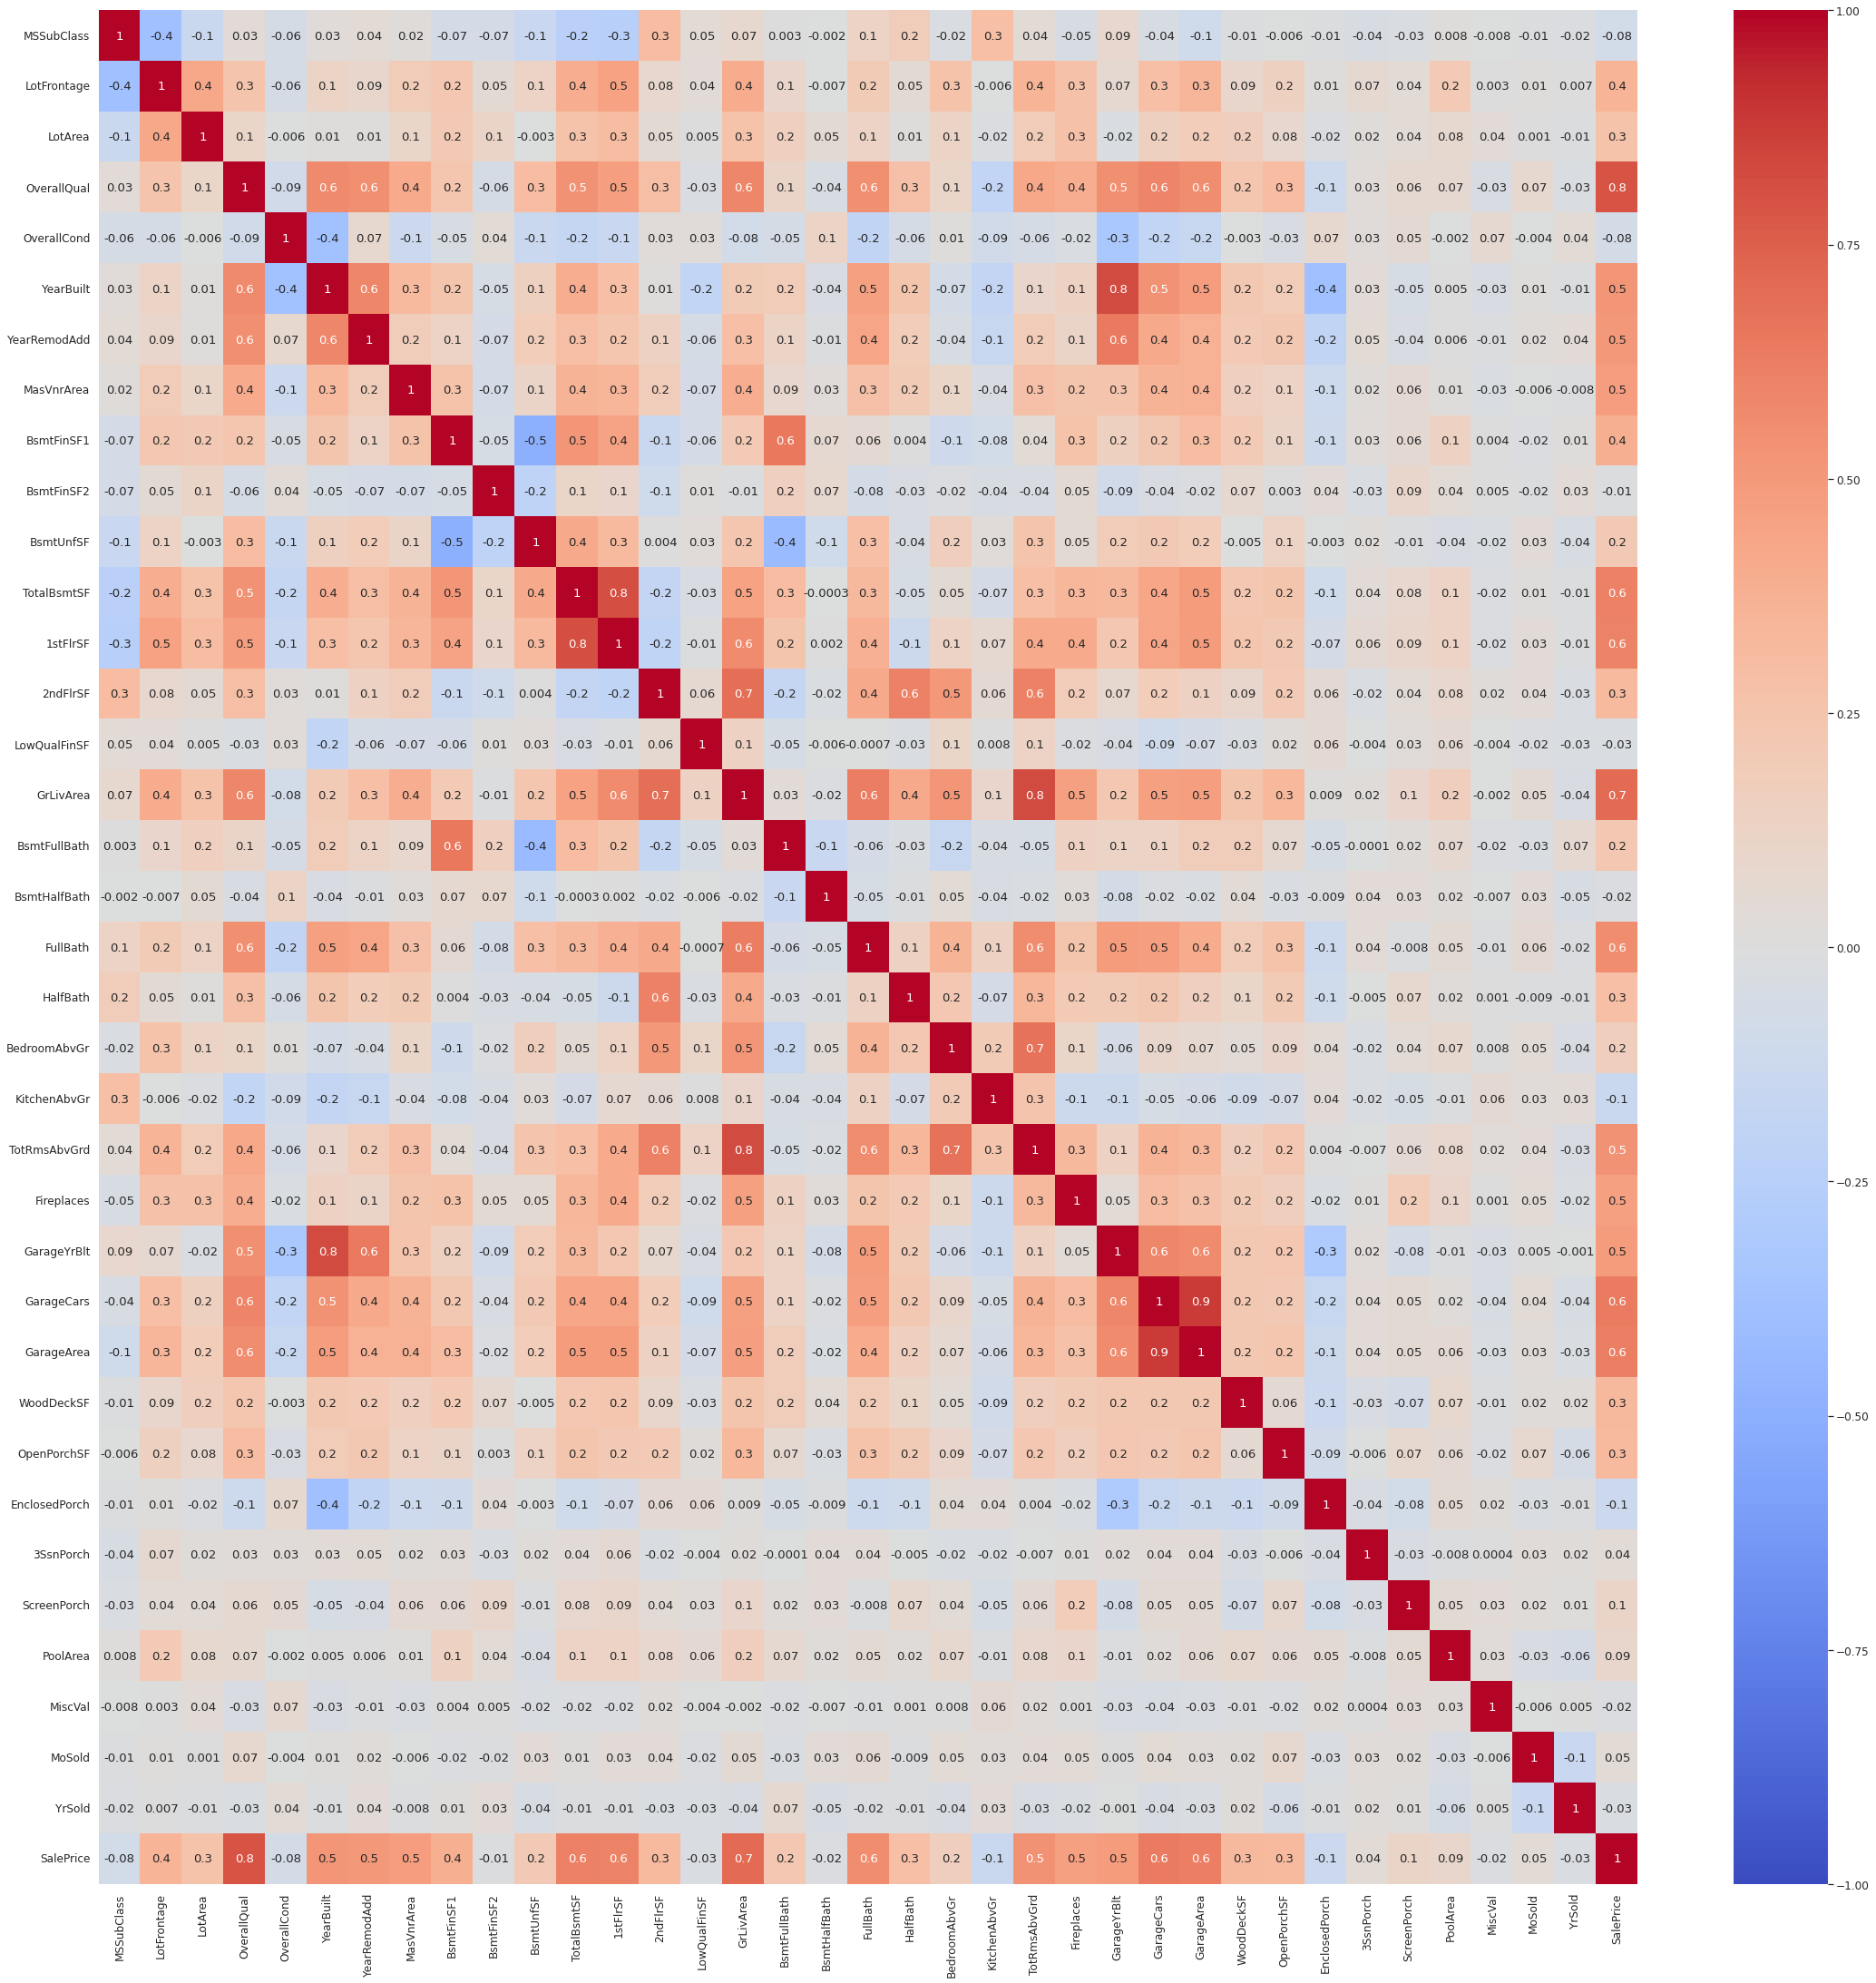

In [138]:
df_train_categorical =  df_train.select_dtypes(exclude=np.number)
print("Categorical:", df_train_categorical.shape)
df_train_num =  df_train.select_dtypes(include=np.number)
df_train_num = df_train_num.drop(['Id'], axis=1)
print("Numerical:", df_train_num.shape)
plt.subplots(figsize=(38, 38))
sns.heatmap(df_train_num.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g')

Figure 3.2: correlation matrix

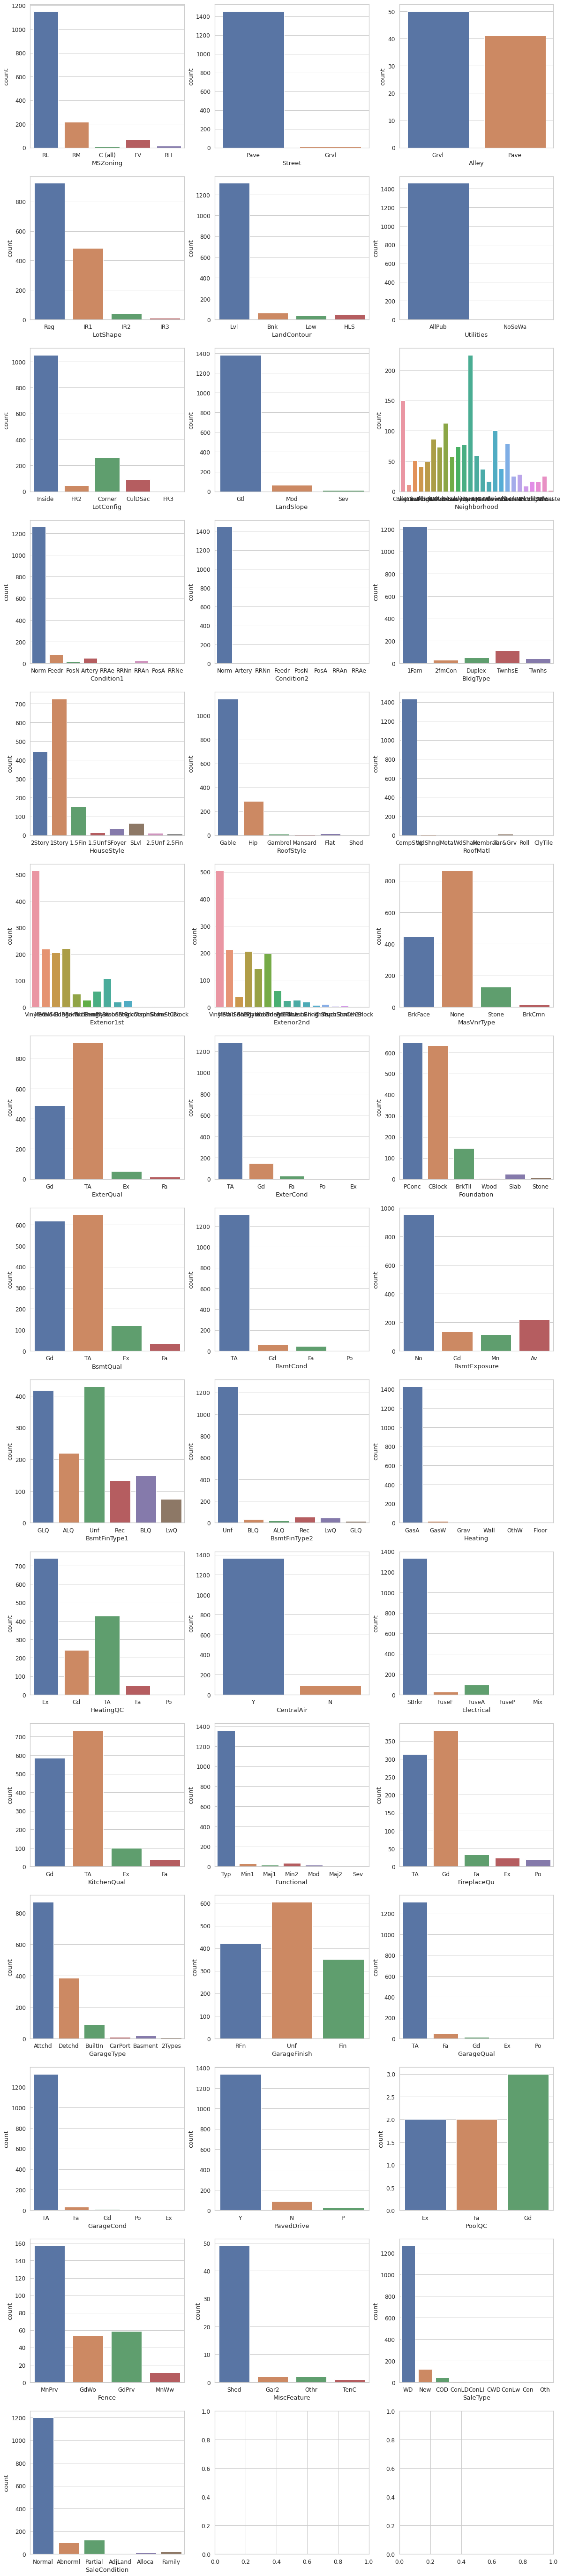

In [139]:
# visualising some more outliers in the data values
fig, ax = plt.subplots(15, 3, figsize=(20, 100))
for var, subplot in zip(df_train_categorical, ax.flatten()):
    sns.countplot(x=var, data=df_train, ax=subplot)

Figure 3.3: bar plot of categorical variables 

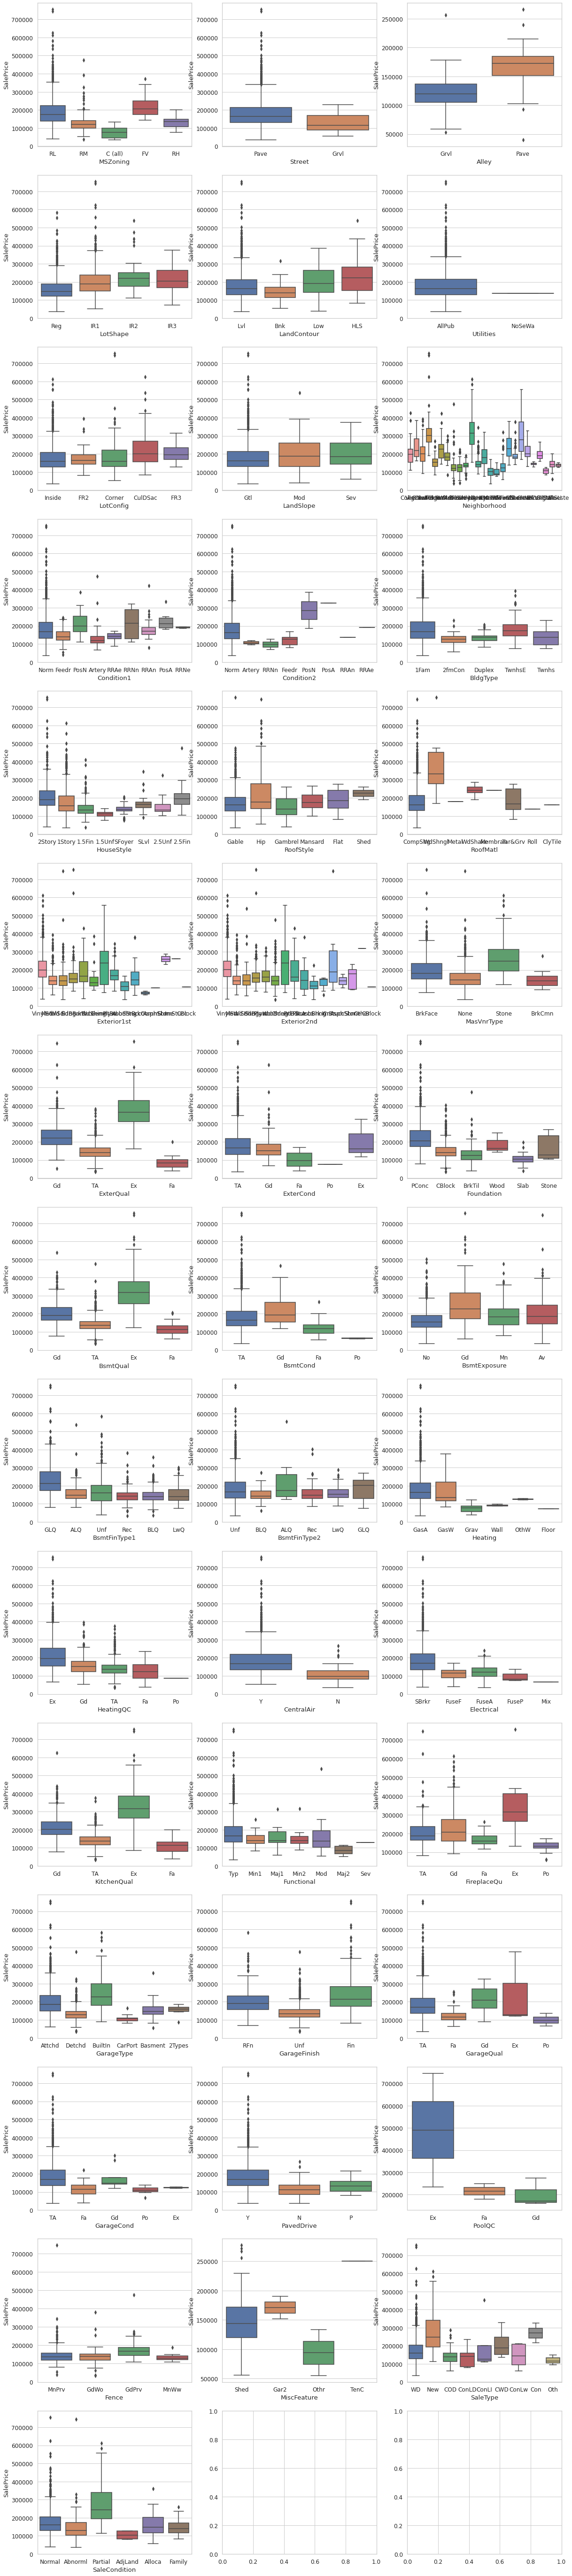

In [140]:
fig, ax = plt.subplots(15, 3, figsize=(20, 100))
for var, subplot in zip(df_train_categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df_train, ax=subplot)

Figure 3.4: box plot of categorical variables 

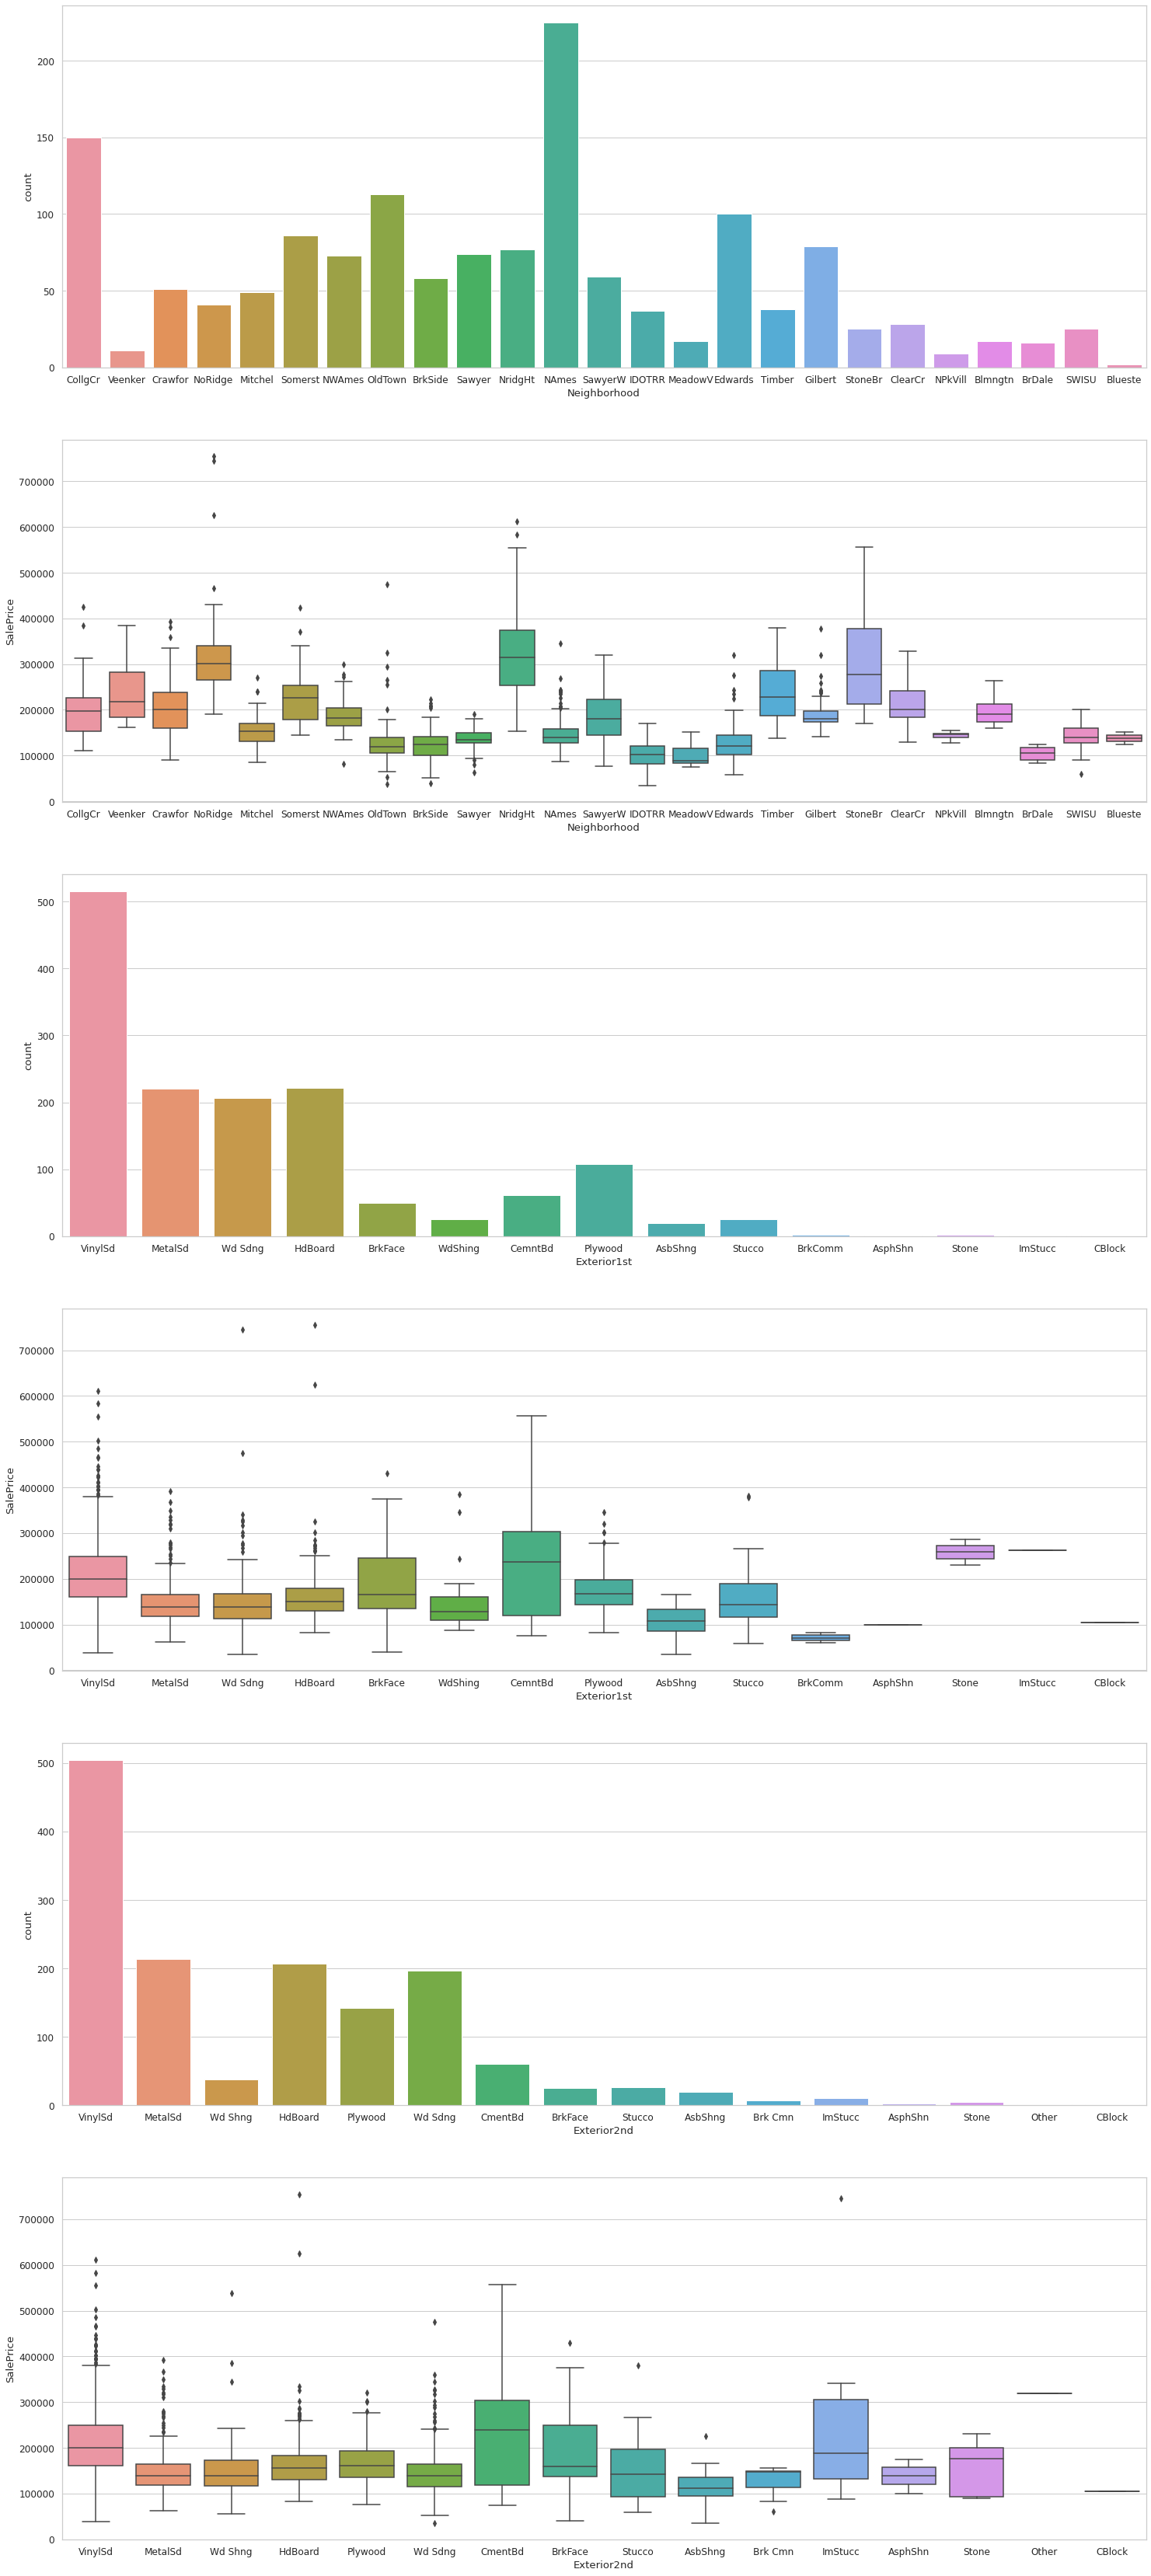

In [141]:
fig = plt.figure(figsize = (25,60))
sns.countplot(x='Neighborhood', data=df_train, ax=fig.add_subplot(6,1,1));
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train, ax=fig.add_subplot(6,1,2));

sns.countplot(x='Exterior1st', data=df_train, ax=fig.add_subplot(6,1,3));
sns.boxplot(x='Exterior1st', y='SalePrice', data=df_train, ax=fig.add_subplot(6,1,4));

sns.countplot(x='Exterior2nd', data=df_train, ax=fig.add_subplot(6,1,5));
sns.boxplot(x='Exterior2nd', y='SalePrice', data=df_train, ax=fig.add_subplot(6,1,6));

In [142]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Figure 4.1: feature creation 

In [143]:
data['TotalSF'] = data['1stFlrSF']  + data['2ndFlrSF'] + data['TotalBsmtSF']
data['TotalPorchSF'] = data['OpenPorchSF']+data['EnclosedPorch']+data['3SsnPorch']+data['ScreenPorch']+data['WoodDeckSF']
data['HouseAge'] = data.YrSold - data.YearBuilt
data['QualityIndex'] = data.OverallQual * data.OverallCond
data['Total_Bathrooms'] = data.BsmtFullBath + .5*data.BsmtHalfBath + data.FullBath + .5*data.HalfBath
data['Has_Fireplaces'] = np.where(data['Fireplaces']>=1, 1, 0)
data['Has_Bsmt'] = np.where(data['TotalBsmtSF']>=0, 1, 0)
data['Has_Garage'] = np.where(data['GarageArea']>=0, 1, 0)
data['Has_Pool'] = np.where(data['PoolArea']>=0, 1, 0)
data['Has_2ndStory'] = np.where(data['2ndFlrSF']>=0, 1, 0)
data.head()

Id  MSSubClass MSZoning  ...  Has_Garage  Has_Pool Has_2ndStory
0   1          60       RL  ...           1         1            1
1   2          20       RL  ...           1         1            1
2   3          60       RL  ...           1         1            1
3   4          70       RL  ...           1         1            1
4   5          60       RL  ...           1         1            1

[5 rows x 90 columns]

Figure 4.2: imputation for missing data

In [144]:
for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
            'GarageCond','GarageType','GarageFinish','GarageQual',
            'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond',
            'BsmtFinType1','MasVnrType','Electrical']:
        data[col] = data[col].fillna('_NA_');
for col in ['MasVnrArea']:
        data[col] = data[col].fillna(0);
for col in ['GarageYrBlt','LotFrontage']:
        data[col] = data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.median()))

Figure 4.3: encode categorical variables

In [145]:
data = pd.get_dummies(data, columns=list(df_train_categorical.columns), drop_first=True)
data.head()

Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
0   1          60  ...                     1                      0
1   2          20  ...                     1                      0
2   3          60  ...                     1                      0
3   4          70  ...                     0                      0
4   5          60  ...                     1                      0

[5 rows x 272 columns]

Figure 5.1: perform both min-max and standard scaling on the dependent variable

In [146]:
# log(1+x) transform
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

# define standard scaler
scaler = StandardScaler()
df_train["StandardScal_SalePrice"] = scaler.fit_transform(df_train[["SalePrice"]])

# define max-min scaler
scaler = MinMaxScaler()
df_train["MaxMinScal_SalePrice"] = scaler.fit_transform(df_train[["SalePrice"]])
df_train.head()

Id  MSSubClass  ... StandardScal_SalePrice  MaxMinScal_SalePrice
0   1          60  ...               0.560067              0.581428
1   2          20  ...               0.212763              0.536316
2   3          60  ...               0.734046              0.604026
3   4          70  ...              -0.437383              0.451868
4   5          60  ...               1.014651              0.640475

[5 rows x 83 columns]